# Regression analysis within variables

Includes: virulence annotation, merops, cazymes, BGCs, metadata, genome statistics

Author: Sandra Godinho Silva \
Creation date: 24/11/2020 \
Version: 0.2 (04/02/2020)

In [146]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt  # To visualize
from sklearn.linear_model import LinearRegression

In [147]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 1000)

In [148]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

## GHs

In [149]:
cazymes = pd.read_csv("../../3_Annotation/Cazyme_counts.csv")
cazymes = cazymes.rename(columns={"index":"ID"})
cazymes_GH = cazymes[cazymes["ID"].str.contains("GH")]
cazymes_GH = cazymes_GH.set_index("ID").T
cazymes_GH["GH total"] = cazymes_GH.sum(axis=1)
cazymes_GH= cazymes_GH.copy()
cazymes_GH = cazymes_GH.reset_index()
cazymes_GH = cazymes_GH[["index", "GH total"]]
cazymes_GH.head()

ID            index  GH total
0   GCA_002431085.1        19
1   GCA_002302445.1        40
2   GCA_014075215.1        23
3   GCA_900186555.1         7
4   GCA_001670625.1         4

## Merops annotation

In [150]:
merops_orfs = pd.read_csv("Merops_results/merops_counts.csv")
merops_orfs = merops_orfs.rename(columns={"Unnamed: 0":"ID"}).set_index("ID").T
merops_orfs["Merops orfs total"] = merops_orfs.sum(axis=1)
#merops_orfs2 = merops_orfs.copy()
merops_orfs = merops_orfs.reset_index()
merops = merops_orfs[["index", "Merops orfs total"]]
merops_orfs.head()
merops_orfs[["Merops orfs total"]].to_csv("Merops_totals.csv")

## Virulence annotation

In [151]:
vir_orfs = pd.read_csv("Virulence_factors_counts2.csv")
vir_orfs = vir_orfs.rename(columns={"Unnamed: 0":"VFs"}).set_index("VFs").T
vir_orfs["Virulence orfs total"] = vir_orfs.sum(axis=1)
vir_orfs2 = vir_orfs.copy()
vir_orfs = vir_orfs.reset_index()
vir_orfs = vir_orfs[["index", "Virulence orfs total"]]
vir_orfs.head()

VFs            index  Virulence orfs total
0    GCA_014397005.1                   366
1    GCA_003970305.1                   224
2    GCA_001464475.1                   254
3    GCA_002591275.1                   346
4    GCA_014305155.1                   292

## Merge with other tables:

In [152]:
metadata = pd.read_csv("../F3/All_info.csv")
metadata = metadata[["Assembly accession","Genus","Family", "scaf_bp", "Completeness", "MAG","Origin"]]
metadata.head(2)

Assembly accession           Genus             Family  scaf_bp  \
0    GCA_000016645.1  Flavobacterium  Flavobacteriaceae  6096872   
1    GCA_000023285.1  Capnocytophaga  Flavobacteriaceae  2612925   

   Completeness    MAG      Origin  
0         99.65  False  Non_marine  
1        100.00  False  Non_marine

In [153]:
statistics = pd.read_csv("../../3_Annotation/Statistics.csv")
statistics.head()

Unnamed: 0  orfs  pfam    ko   cog  cazymes  Orfs_anno_ko%  \
0  GCA_002431085.1  2758  4628  1162  1809       47      42.131980   
1  GCA_002302445.1  2226  3776   859  1364       65      38.589398   
2  GCA_014075215.1  4465  5916  1129  2260       52      25.285554   
3  GCA_900186555.1  2294  4094   975  1534       56      42.502180   
4  GCA_001670625.1  1980  3428   865  1313       38      43.686869   

   Orfs_anno_cog%  Orfs_anno_cazymes%  
0       65.591008            1.704133  
1       61.275831            2.920036  
2       50.615901            1.164614  
3       66.870096            2.441151  
4       66.313131            1.919192

In [154]:
bgcs = pd.read_csv("../../3_Annotation/antismash_results/BGCs_resumed.csv")
bgcs= bgcs.set_index("index").T
bgcs["Nr_BGCs"] = bgcs.sum(axis=1)
bgcs.head()

index            NRPS  NRPS_PKS_hybrid  NRPS_other  Others  PKSI  PKSIII  \
GCA_002831645.1     0                0           0       1     0       1   
GCA_001971785.1     0                0           0       0     0       0   
GCA_002951395.1     0                0           0       0     0       0   
GCA_903969135.1     1                0           0       1     0       0   
GCA_009664855.1     0                0           0       2     0       1   

index            PKS_other  RiPPs  Siderophore  terpene  transAT_PSK  Nr_BGCs  
GCA_002831645.1          0      1            0        1            0        4  
GCA_001971785.1          0      1            0        1            0        2  
GCA_002951395.1          0      0            1        1            0        2  
GCA_903969135.1          1      3            1        1            0        8  
GCA_009664855.1          0      2            0        2            0        7

## Main table:

In [155]:
df = pd.merge(merops, metadata, how="left", left_on="index", right_on="Assembly accession")
df = pd.merge(df, cazymes_GH, how="left",  left_on="index", right_on="index")
df.head(2)

index  Merops orfs total Assembly accession           Genus  \
0  GCA_900186545.1                107    GCA_900186545.1  Flavobacterium   
1  GCA_900312745.1                269    GCA_900312745.1      Aquimarina   

              Family    scaf_bp  Completeness    MAG        Origin  GH total  
0  Flavobacteriaceae  2647639.0         99.29  False  Unclassified         7  
1  Flavobacteriaceae  6185987.0         99.62  False  Unclassified        48

In [156]:
merge = pd.merge(statistics[["Unnamed: 0","cazymes","Orfs_anno_cazymes%","orfs"]], merops, how="left", left_on="Unnamed: 0", right_on="index")
merge = pd.merge(merge, cazymes_GH, how="left", left_on="index", right_on="index")

merge["Orfs_anno_merops%"] = merge["Merops orfs total"]/merge["orfs"]*100
merge =pd.merge(merge,metadata, how="left", left_on="Unnamed: 0", right_on="Assembly accession")

merge = pd.merge(merge, bgcs["Nr_BGCs"],  how="left", left_on="index", right_index=True ).dropna()
merge = pd.merge(merge, vir_orfs, how="left", left_on="Unnamed: 0", right_on="index")

merge["Orfs_anno_virs%"] = merge["Virulence orfs total"]/merge["orfs"]*100
merge["PEP:GH"] = merge["Merops orfs total"]/merge["cazymes"]
merge["BGCs/genomesize"]=merge["Nr_BGCs"]/merge["scaf_bp"]

merge["merops_perMb"] = merge["Merops orfs total"]/merge["scaf_bp"]*1000000
merge["virs_perMb"] = merge["Virulence orfs total"]/merge["scaf_bp"]*1000000
merge["bgc_perMb"] = merge["Nr_BGCs"]/merge["scaf_bp"]*1000000
merge["cazymes_perMb"] = merge["cazymes"]/merge["scaf_bp"]*1000000


merge=merge.sort_values(by="PEP:GH")
merge.tail()

Unnamed: 0  cazymes  Orfs_anno_cazymes%  orfs          index_x  \
412   GCA_003610735.1       27            1.015038  2660  GCA_003610735.1   
2388  GCA_013215105.1       26            0.959056  2711  GCA_013215105.1   
2331  GCA_002700005.1       33            1.036432  3184  GCA_002700005.1   
1665  GCA_014385425.1       35            0.590120  5931  GCA_014385425.1   
2004  GCA_003484565.1       14            0.848999  1649  GCA_003484565.1   

      Merops orfs total  GH total  Orfs_anno_merops% Assembly accession  \
412                 125         5           4.699248    GCA_003610735.1   
2388                121         5           4.463298    GCA_013215105.1   
2331                156         7           4.899497    GCA_002700005.1   
1665                169        22           2.849435    GCA_014385425.1   
2004                 69         1           4.184354    GCA_003484565.1   

                        Genus             Family    scaf_bp  Completeness  \
412             Tenacibaculum  Flavobacteriaceae  2869467.0         99.55   
2388  Uncl. Flavobacteriaceae  Flavobacteriaceae  3054187.0         93.26   
2331            Tenacibaculum  Flavobacteriaceae  3812843.0         99.66   
1665           Flavobacterium  Flavobacteriaceae  3759660.0         86.74   
2004                Kaistella      Weeksellaceae  1748436.0         71.93   

        MAG        Origin  Nr_BGCs          index_y  Virulence orfs total  \
412   False        Marine      2.0  GCA_003610735.1                   203   
2388   True        Marine      1.0  GCA_013215105.1                   206   
2331  False        Marine      7.0  GCA_002700005.1                   248   
1665  False  Unclassified      3.0  GCA_014385425.1                   266   
2004   True    Non_marine      1.0  GCA_003484565.1                   102   

      Orfs_anno_virs%    PEP:GH  BGCs/genomesize  merops_perMb  virs_perMb  \
412          7.631579  4.629630     6.969936e-07     43.562097   70.744846   
2388         7.598672  4.653846     3.274194e-07     39.617744   67.448391   
2331         7.788945  4.727273     1.835900e-06     40.914352   65.043329   
1665         4.484910  4.828571     7.979445e-07     44.950873   70.751079   
2004         6.185567  4.928571     5.719397e-07     39.463841   58.337852   

      bgc_perMb  cazymes_perMb  
412    0.696994       9.409413  
2388   0.327419       8.512904  
2331   1.835900       8.654959  
1665   0.797944       9.309352  
2004   0.571940       8.007156

In [157]:
dfx = merge.groupby(['Genus', "Family"]).filter(lambda x:x['Genus'].count()>7).groupby(['Genus', "Family"]).describe()#.reset_index().sort_values(by=["Family","Genus"])
dfx.columns = [' '.join(col).strip() for col in dfx.columns.values]
dfx.columns = dfx.columns.get_level_values(0)

#.set_index("Genus")
#df1["P"] = df1["Merops orfs total"]/(df1["cazymes"]+df1["Merops orfs total"])*2
#df1["P2"] = df1["merops_permb"]/(df1["cazymes_permb"]+df1["merops_permb"])*2
dfx.head()

Aequorivita Flavobacteriaceae   3081628.25    3193359.0    3327236.0   
Algibacter  Flavobacteriaceae   4638103.00    4705407.0    4707503.0   
Apibacter   Weeksellaceae       2275687.00    2326653.0    2331098.0   
Aquimarina  Flavobacteriaceae   5125818.00    5838147.0    6131240.0   
Arenibacter Flavobacteriaceae   4728098.00    5260762.0    5472734.0   

                               scaf_bp max  Completeness count  \
Genus       Family                                               
Aequorivita Flavobacteriaceae    4042904.0                42.0   
Algibacter  Flavobacteriaceae    4816342.0                 9.0   
Apibacter   Weeksellaceae        3296886.0                21.0   
Aquimarina  Flavobacteriaceae    7041311.0                39.0   
Arenibacter Flavobacteriaceae    5857781.0                22.0   

                               Completeness mean  Completeness std  \
Genus       Family                                                   
Aequorivita Flavobacteriaceae          95.061429          7.337054   
Algibacter  Flavobacteriaceae          98.622222          1.892120   
Apibacter   Weeksellaceae             100.000000          0.000000   
Aquimarina  Flavobacteriaceae          97.797692          7.311414   
Arenibacter Flavobacteriaceae          98.362727          5.094899   

                               Completeness min  Completeness 25%  \
Genus       Family                                                  
Aequorivita Flavobacteriaceae             70.29            91.895   
Algibacter  Flavobacteriaceae             94.71            99.340   
Apibacter   Weeksellaceae                100.00           100.000   
Aquimarina  Flavobacteriaceae             58.50            99.620   
Arenibacter Flavobacteriaceae             75.78            99.670   

                               Completeness 50%  Completeness 75%  \
Genus       Family                                                  
Aequorivita Flavobacteriaceae             98.48             99.24   
Algibacter  Flavobacteriaceae             99.56             99.67   
Apibacter   Weeksellaceae                100.00            100.00   
Aquimarina  Flavobacteriaceae             99.62             99.62   
Arenibacter Flavobacteriaceae             99.67             99.67   

                               Completeness max  Nr_BGCs count  Nr_BGCs mean  \
Genus       Family                                                             
Aequorivita Flavobacteriaceae            100.00           42.0      2.952381   
Algibacter  Flavobacteriaceae             99.67            9.0      1.777778   
Apibacter   Weeksellaceae                100.00           21.0      1.095238   
Aquimarina  Flavobacteriaceae             99.62           39.0      9.512821   
Arenibacter Flavobacteriaceae             99.67           22.0      4.681818   

                               Nr_BGCs std  Nr_BGCs min  Nr_BGCs 25%  \
Genus       Family                                                     
Aequorivita Flavobacteriaceae     0.696765          1.0         3.00   
Algibacter  Flavobacteriaceae     0.440959          1.0         2.00   
Apibacter   Weeksellaceae         0.300793          1.0         1.00   
Aquimarina  Flavobacteriaceae     4.012296          2.0         8.00   
Arenibacter Flavobacteriaceae     0.838727          3.0         4.25   

                               Nr_BGCs 50%  Nr_BGCs 75%  Nr_BGCs max  \
Genus       Family                                                     
Aequorivita Flavobacteriaceae          3.0          3.0          5.0   
Algibacter  Flavobacteriaceae          2.0          2.0          2.0   
Apibacter   Weeksellaceae              1.0          1.0          2.0   
Aquimarina  Flavobacteriaceae          9.0         10.5         23.0   
Arenibacter Flavobacteriaceae          5.0          5.0          6.0   

                               Virulence orfs total count  \
Genus       Family                                          
Aequorivita Flavobacteri

In [227]:
df_origin = merge.groupby(["Origin"])[["merops_perMb","cazymes_perMb"]].describe()#.reset_index().sort_values(by=["Family","Genus"])~
df_origin.columns = [' '.join(col).strip() for col in df_origin.columns.values]
df_origin.columns = df_origin.columns.get_level_values(0)

#.set_index("Genus")
#df1["P"] = df1["Merops orfs total"]/(df1["cazymes"]+df1["Merops orfs total"])*2
#df1["P2"] = df1["merops_permb"]/(df1["cazymes_permb"]+df1["merops_permb"])*2

#df_origin = pd.melt(df_origin.reset_index(), id_vars=['Origin'], value_vars=['merops_perMb'])
df_origin.head()

merops_perMb count  merops_perMb mean  merops_perMb std  \
Origin                                                                  
Marine                     758.0          38.496179          5.774565   
Non_marine                 855.0          37.414216          4.269142   
Unclassified               928.0          37.290576          4.571539   

              merops_perMb min  merops_perMb 25%  merops_perMb 50%  \
Origin                                                               
Marine               14.657982         34.290414         38.681225   
Non_marine           23.756296         34.507203         37.982244   
Unclassified         21.422985         34.338553         37.752782   

              merops_perMb 75%  merops_perMb max  cazymes_perMb count  \
Origin                                                                  
Marine               42.333225         61.461520                758.0   
Non_marine           40.518299         54.037573                855.0   
Unclassified         40.378264         60.245096                928.0   

              cazymes_perMb mean  cazymes_perMb std  cazymes_perMb min  \
Origin                                                                   
Marine                 22.981075           7.869409           6.830904   
Non_marine             23.399042           9.068297           8.007156   
Unclassified           25.095026           9.115550           7.908711   

              cazymes_perMb 25%  cazymes_perMb 50%  cazymes_perMb 75%  \
Origin                                                                  
Marine                17.516029          21.825649          26.978224   
Non_marine            18.074012          21.167424          26.453941   
Unclassified          19.644341          23.871752          28.006297   

              cazymes_perMb max  
Origin                           
Marine                53.672696  
Non_marine            66.745746  
Unclassified          66.181153

In [229]:
a = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_perMb mean","cazymes_perMb mean"])
a["id"] = a["Origin"] +"_"+a["variable"].str.replace("_perMb mean","")
a=a[["id","value"]]
a= a.rename(columns={"value":"mean"})

b = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_perMb std","cazymes_perMb std"])
b["id"] = b["Origin"] +"_"+b["variable"].str.replace("_perMb std","")
b=b[["id","value"]]
b= b.rename(columns={"value":"std"})
merge_ab = pd.merge(a,b, how="left", left_on="id", right_on="id")

c = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_perMb max","cazymes_perMb max"])
c["id"] = c["Origin"] +"_"+c["variable"].str.replace("_perMb max","")
c=c[["id","value"]]
c= c.rename(columns={"value":"max"})
merge_ab = pd.merge(merge_ab,c, how="left", left_on="id", right_on="id")

d = df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_perMb min","cazymes_perMb min"])
d["id"] = d["Origin"] +"_"+d["variable"].str.replace("_perMb min","")
d=d[["id","value"]]
d= d.rename(columns={"value":"min"})
merge_ab = pd.merge(merge_ab,d, how="left", left_on="id", right_on="id")

merge_ab.head(10)

id       mean       std        max        min
0         Marine_merops  38.496179  5.774565  61.461520  14.657982
1     Non_marine_merops  37.414216  4.269142  54.037573  23.756296
2   Unclassified_merops  37.290576  4.571539  60.245096  21.422985
3        Marine_cazymes  22.981075  7.869409  53.672696   6.830904
4    Non_marine_cazymes  23.399042  9.068297  66.745746   8.007156
5  Unclassified_cazymes  25.095026  9.115550  66.181153   7.908711

<Figure size 720x216 with 0 Axes>

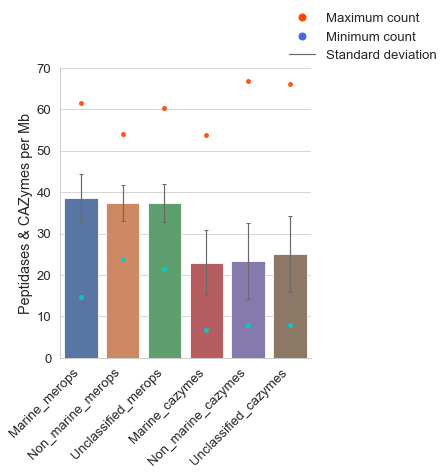

In [242]:
sns.set_style({'font.family': 'Arial'})
sns.set(style="whitegrid")
sns.set_context("paper", font_scale=1.5) 

plt.figure(figsize=(10,3))

g = sns.catplot(
    data=merge_ab, kind="bar", 
    x='id', dodge=False, legend_out=True, 
    y='mean', #xerr="std",
    height=5, # make the plot 7 units high
    aspect=1) # height is n times width

#g._legend.set_bbox_to_anchor((0.12, 0.92))

g.map(plt.errorbar, "id", "mean", "std", ls='none', capsize=2, color="dimgrey")

#g.map(plt.scatter(x="Genus",y="Nr_BGCs_max"))

sns.stripplot(x='id',y='max', data=merge_ab, jitter=False, color="orangered", alpha=0.9)
sns.stripplot(x='id',y='min', data=merge_ab, jitter=False, color="darkturquoise", alpha=0.9)

plt.xlabel('') #, fontsize=15
plt.ylabel('Peptidases & CAZymes per Mb')#fontsize=13

for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='orangered', marker='o', ls="",
                          markersize=7, label='Maximum count')
blue_line = mlines.Line2D([], [], color='royalblue', marker='o',ls="",
                          markersize=7, label='Minimum count')
black_line=mlines.Line2D([], [], color='dimgrey', #marker='',
                          markersize=7, label='Standard deviation')
plt.legend(handles=[red_line,blue_line, black_line], bbox_to_anchor=(0.89, 1), loc=(0,2), borderaxespad=0.);

#plt.show()    
ax = plt.gca()
g.savefig("perMb.svg")

In [205]:
df_origin.reset_index().melt(id_vars="Origin",value_vars=["merops_perMb std","cazymes_perMb std"])

Origin           variable     value
0        Marine   merops_perMb std  5.774565
1    Non_marine   merops_perMb std  4.269142
2  Unclassified   merops_perMb std  4.571539
3        Marine  cazymes_perMb std  7.869409
4    Non_marine  cazymes_perMb std  9.068297
5  Unclassified  cazymes_perMb std  9.115550

In [ ]:
df_origin.reset_index().pivot(index='Origin',columns='class2',values='val').plot(kind='bar', yerr=df.pivot(index='class1',columns='class2',values='se').values)


<AxesSubplot:xlabel='Origin'>

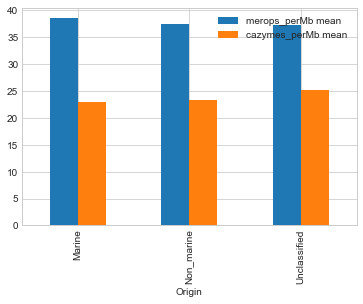

In [159]:
df_origin[["merops_perMb mean","cazymes_perMb mean",]].plot(kind="bar")#.unstack('Origin').to_frame()#.T#.droplevel(level=0) #"merops_perMb std","cazymes_perMb std"

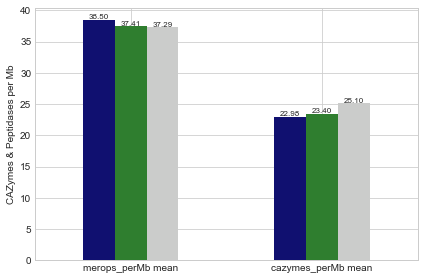

In [203]:
my_colors=["#101070","#2f7e2f","#cbcccb"]

ax = df_origin[["merops_perMb mean","cazymes_perMb mean"]].T.plot(kind="bar", color=my_colors, legend=False)

plt.ylabel('CAZymes & Peptidases per Mb')
plt.xticks( horizontalalignment='center', rotation=360)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=8) # set the alignment of the text

#sns.stripplot(x='Origin',y='cazymes_perMb max', data=df_origin.reset_index(), jitter=False, color="orangered", alpha=0.9)
#sns.stripplot(x='Origin',y='cazymes_perMb min', data=df_origin.reset_index(), jitter=False, color="darkturquoise", alpha=0.9)


plt.tight_layout()
plt.show()

ax.figure.savefig("Ratio.svg", dpi=300)

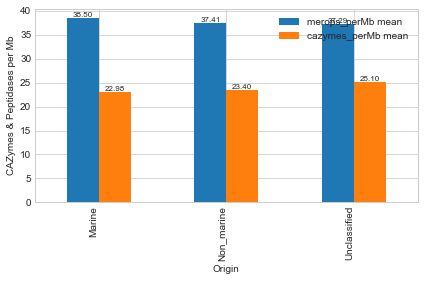

In [161]:

ax = df_origin[["merops_perMb mean","cazymes_perMb mean"]].plot(kind="bar")

plt.ylabel('CAZymes & Peptidases per Mb')
plt.xticks( horizontalalignment='right') #rotation=-180,

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.2f}'.format(y), (x.mean(),y),ha='center', va='bottom', fontsize=8) # set the alignment of the text

#sns.stripplot(x='Origin',y='cazymes_perMb max', data=df_origin.reset_index(), jitter=False, color="orangered", alpha=0.9)
#sns.stripplot(x='Origin',y='cazymes_perMb min', data=df_origin.reset_index(), jitter=False, color="darkturquoise", alpha=0.9)


plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='Origin'>

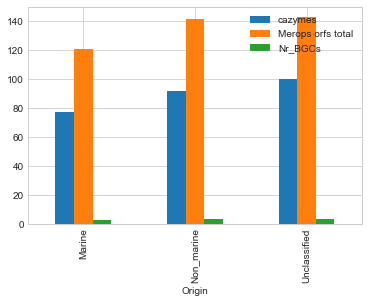

In [162]:
merge.groupby("Origin")["cazymes","Merops orfs total", "Nr_BGCs"].mean().plot(kind="bar")

<AxesSubplot:xlabel='Origin'>

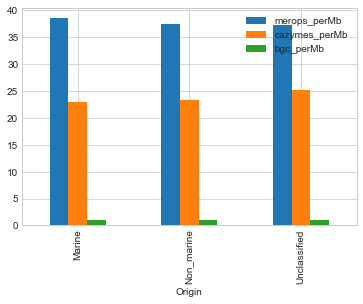

In [163]:
merge.groupby("Origin")["merops_perMb", "cazymes_perMb","bgc_perMb"].mean().plot(kind="bar")

<AxesSubplot:xlabel='MAG'>

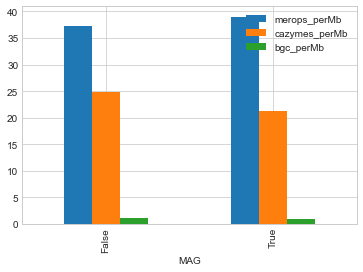

In [164]:
merge.groupby("MAG")["merops_perMb", "cazymes_perMb", "bgc_perMb"].mean().plot(kind="bar")

# Plots per Genome Size

R^2: 0.5372911253321776
Intercept: [-36.63186765]
Slop: [[3.48836203e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


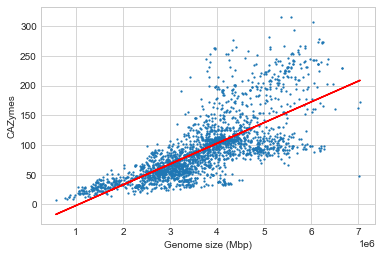

In [165]:

X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y, s=1.5)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Genome size (Mbp)")
plt.ylabel("CAZymes")

plt.savefig("cazymes_per_Mb.svg", dpi=300)
plt.show()

R^2: 0.8018752301076578
Intercept: [15.33670694]
Slop: [[3.30298048e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


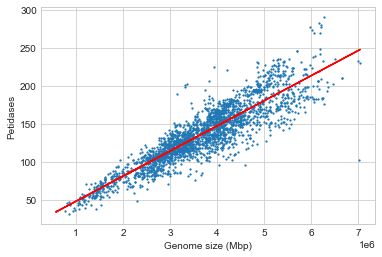

In [189]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Merops orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())


plt.scatter(X, Y, s=1.5)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Genome size (Mbp)")
plt.ylabel("Petidases")

plt.savefig("peptidases_per_Mb.svg", dpi=300)
plt.show()

R^2: 0.4184233180902047
Intercept: [-2.38036673]
Slop: [[1.65880883e-06]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


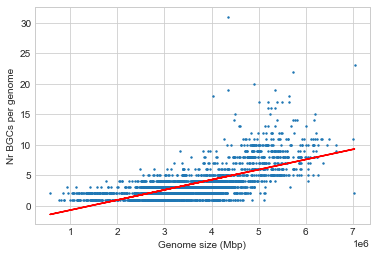

In [166]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Nr_BGCs"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y, s=2)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Genome size (Mbp)")
plt.ylabel("Nr BGCs per genome")

plt.savefig("bgcs_per_mb.svg", dpi=300)
plt.show()

R^2: 0.9332038979205894
Intercept: [-10.17160199]
Slop: [[7.24547202e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


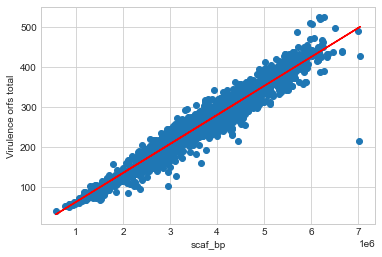

In [188]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Virulence orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("scaf_bp")
plt.ylabel("Virulence orfs total")

plt.show()

R^2: 0.4389965750916345
Intercept: [-42.427749]
Slop: [[2.40960403e-05]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


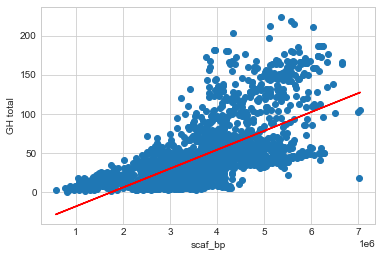

In [169]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["GH total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("scaf_bp")
plt.ylabel("GH total")

plt.show()

R^2: 0.1313650582733895
Intercept: [2.69252412]
Slop: [[-2.42459971e-07]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


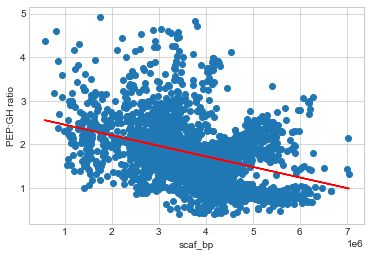

In [170]:
X = merge["scaf_bp"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["PEP:GH"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("scaf_bp")
plt.ylabel("PEP:GH ratio")

plt.show()

# Others

R^2: 0.005689216953721377
Intercept: [1.88025679]
Slop: [[-0.01967605]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


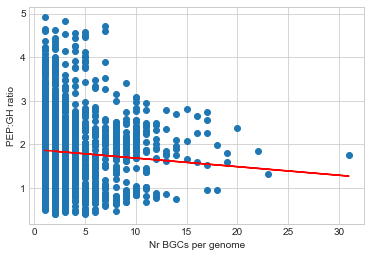

In [171]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["PEP:GH"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("PEP:GH ratio")

plt.show()

R^2: 0.41982287568525134
Intercept: [184.57684512]
Slop: [[18.95060426]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


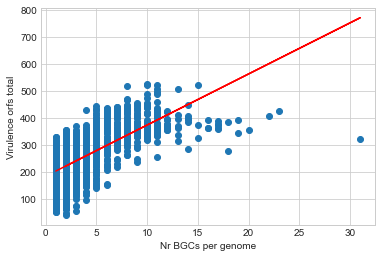

In [172]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Virulence orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Virulence orfs total")

plt.show()

R^2: 0.26793255998628285
Intercept: [-0.08946069]
Slop: [[0.66784681]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


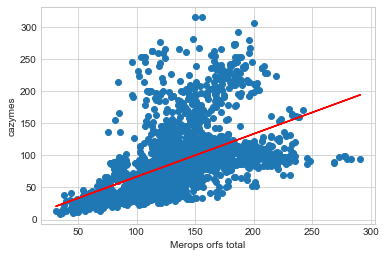

In [173]:
X = merge["Merops orfs total"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Merops orfs total")
plt.ylabel("cazymes")

plt.show()

R^2: 0.013110312204605679
Intercept: [36.65723179]
Slop: [[1.06874793]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


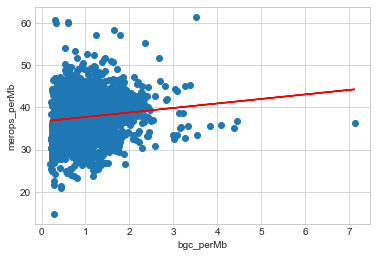

In [174]:
X = merge["bgc_perMb"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["merops_perMb"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("bgc_perMb")
plt.ylabel("merops_perMb")

plt.show()

R^2: 0.028550706669985715
Intercept: [67.88755923]
Slop: [[0.37419265]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


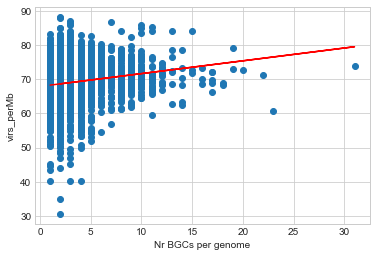

In [175]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["virs_perMb"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("virs_perMb")

plt.show()

R^2: 0.050724947331134085
Intercept: [93.8349894]
Slop: [[0.65900214]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


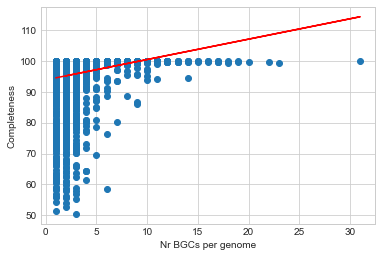

In [176]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Completeness"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Completeness")

plt.show()

np.savetxt("foo.csv", X, delimiter=",")
np.savetxt("foo2.csv", Y, delimiter=",")

R^2: 0.0044075965724502675
Intercept: [6.850897e-05]
Slop: [[0.77708653]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


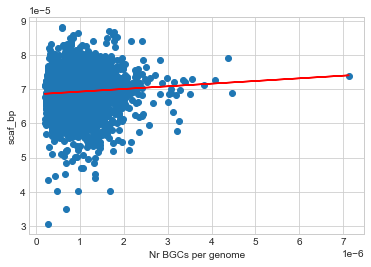

In [177]:
X = (merge["Nr_BGCs"]/merge["scaf_bp"]).dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = (merge["Virulence orfs total"]/merge["scaf_bp"]).values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("scaf_bp")

plt.show()

R^2: 0.06063173432049529
Intercept: [3156729.66429253]
Slop: [[5.07508407e+11]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


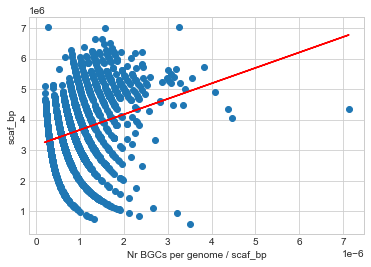

In [178]:
X = (merge["Nr_BGCs"]/merge["scaf_bp"]).dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["scaf_bp"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome / scaf_bp")
plt.ylabel("scaf_bp")

plt.show()



R^2: 0.050724947331134085
Intercept: [93.8349894]
Slop: [[0.65900214]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


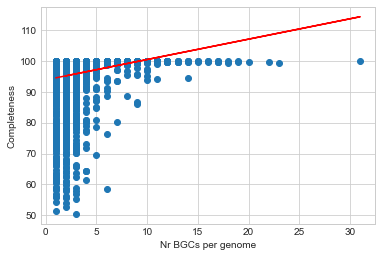

In [179]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Completeness"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Completeness")

plt.show()

R^2: 0.43137725416365325
Intercept: [101.15017878]
Slop: [[9.44697639]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


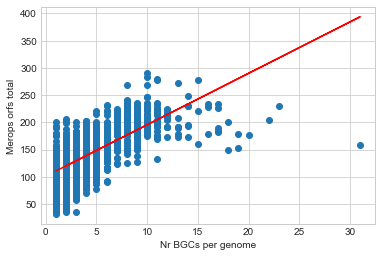

In [180]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Merops orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Merops orfs total")

plt.show()

R^2: 0.12664635091486298
Intercept: [66.37992613]
Slop: [[6.60426755]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


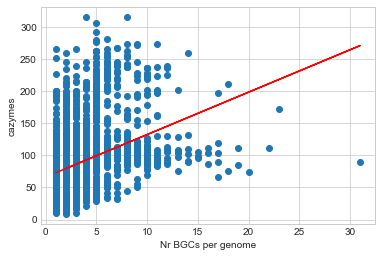

In [181]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["cazymes"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("cazymes")

plt.show()

R^2: 0.05791943184285542
Intercept: [7.49039038]
Slop: [[0.06855147]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


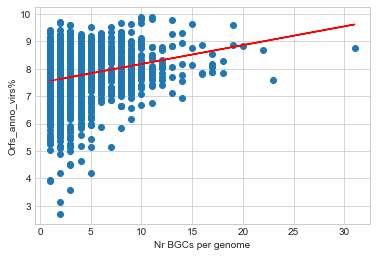

In [182]:
X = merge["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Orfs_anno_virs%"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Orfs_anno_virs%")

plt.show()

R^2: 0.06266685036782116
Intercept: [8.23625819]
Slop: [[-0.27334543]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


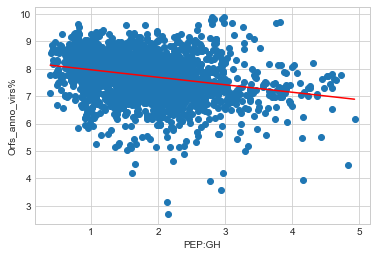

In [183]:
X = merge["PEP:GH"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge["Orfs_anno_virs%"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("PEP:GH")
plt.ylabel("Orfs_anno_virs%")

plt.show()

## By Genus

In [184]:
merge2= merge.copy()
merge2= merge2.groupby("Genus").mean()
merge2.head()

cazymes  Orfs_anno_cazymes%         orfs  Merops orfs total  \
Genus                                                                          
AU392          53.000000            1.744574  3038.000000         200.500000   
Aequorivita    53.309524            1.796647  2958.714286         124.642857   
Algibacter    178.888889            4.441777  4080.777778         134.888889   
Algibacter_A  194.000000            5.806645  3341.000000         120.000000   
Algibacter_B  168.000000            4.933799  3359.200000         108.600000   

                GH total  Orfs_anno_merops%       scaf_bp  Completeness  \
Genus                                                                     
AU392          15.000000           6.599673  3.336441e+06     99.100000   
Aequorivita     6.857143           4.210442  3.200450e+06     95.061429   
Algibacter    116.777778           3.347715  4.651915e+06     98.622222   
Algibacter_A   96.000000           3.591739  3.994770e+06     98.680000   
Algibacter_B   95.600000           3.254936  4.017717e+06     99.340000   

               Nr_BGCs  Virulence orfs total  Orfs_anno_virs%    PEP:GH  \
Genus                                                                     
AU392         2.000000            294.000000         9.677391  3.783019   
Aequorivita   2.952381            229.452381         7.745143  2.390956   
Algibacter    1.777778            317.444444         7.893644  0.761134   
Algibacter_A  1.000000            284.000000         8.500449  0.618557   
Algibacter_B  1.200000            292.600000         8.696474  0.692603   

              BGCs/genomesize  merops_perMb  virs_perMb  bgc_perMb  \
Genus                                                                
AU392            5.994559e-07     60.093222   88.118526   0.599456   
Aequorivita      9.272511e-07     38.918196   71.623682   0.927251   
Algibacter       3.800332e-07     29.010905   68.208193   0.380033   
Algibacter_A     2.503273e-07     30.039276   71.092954   0.250327   
Algibacter_B     3.119790e-07     27.386469   72.919639   0.311979   

              cazymes_perMb  
Genus                        
AU392             15.885580  
Aequorivita       16.612573  
Algibacter        38.375071  
Algibacter_A      48.563497  
Algibacter_B      41.167071

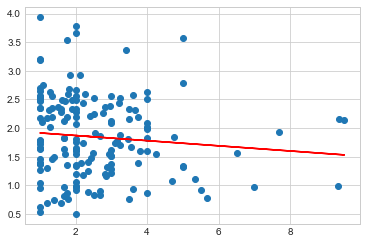

In [185]:
X = merge2["Nr_BGCs"].values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["PEP:GH"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

R^2: 0.2976850304979045
Intercept: [155.9918277]
Slop: [[25.8982655]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}


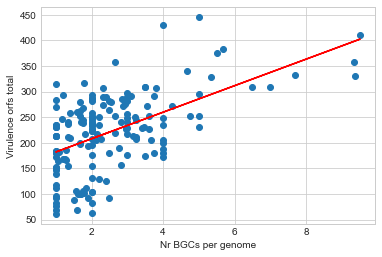

In [186]:
X = merge2["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["Virulence orfs total"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("Virulence orfs total")

plt.show()

R^2: 0.3075775654656361
Intercept: [2300047.10300126]
Slop: [[349251.99863498]]
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': True}


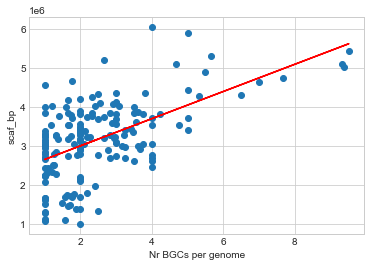

In [187]:
X = merge2["Nr_BGCs"].dropna().values.reshape(-1, 1)  # values converts it into a numpy array
Y = merge2["scaf_bp"].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(normalize=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
p = linear_regressor.get_params
Y_pred = linear_regressor.predict(X)  # make predictions

#Returns the coefficient of determination R^2 of the prediction.
print("R^2: " + str(linear_regressor.score(X,Y)))

#To retrieve the intercept:
print("Intercept: " + str(linear_regressor.intercept_))
#For retrieving the slope (coefficient of x):
print("Slop: " + str(linear_regressor.coef_))

print(linear_regressor.get_params())

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.xlabel("Nr BGCs per genome")
plt.ylabel("scaf_bp")

plt.show()